# Logistic Regression

Logistic regression is a statistical method for predicting the probability of a binary outcome (i.e., two classes, often coded as \(0\) and \(1\)) based on one or more predictor variables. Unlike linear regression, which predicts a continuous value, logistic regression predicts probabilities that are mapped to two classes using the **logistic function** (sigmoid).

## Logistic Function (Sigmoid)

The logistic function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:
- $z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$ is the linear combination of the features.
- $e$ is Euler's number (approximately 2.71828).
- $\sigma(z)$ is the predicted probability that the target $y = 1$ (i.e., a "positive" class).

## Logistic Regression Model

The logistic regression equation is:


$$
P(y = 1 | X) = \sigma(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n)
$$

Where:
- $P(y = 1 | X)$ is the probability that the target $y$ equals 1, given the feature vector $X$.
- $\theta_0, \theta_1, \dots, \theta_n$ are the coefficients (weights) of the model that we aim to estimate.

### Cost Function (Log-Loss)

The cost function for logistic regression is the **log-likelihood** or **cross-entropy** loss, which quantifies how well the model’s predicted probabilities match the actual labels. The formula for logistic regression's cost function is:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

Where:
- $m$ is the number of training samples.
- $y_i$ is the true label of the $i$-th sample.
- $\hat{y}_i = \sigma(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots)$ is the predicted probability of the positive class for the $i$-th sample.

We aim to minimize this cost function using **gradient descent** or **other optimization algorithms**.

## Making Predictions

Once the parameters $\theta_0, \theta_1, \dots, \theta_n$ are optimized, we can make predictions for new data points using the logistic function:

$$
P(y = 1 | X) = \sigma(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n)
$$

The predicted probability $\hat{y}$ is mapped to a binary class (0 or 1) using a threshold of 0.5:

- If $\hat{y} \geq 0.5$, predict class 1.
- If $\hat{y} < 0.5$, predict class 0.

## Gradient Descent vs Normal Equation

- The **Normal Equation** can be solved directly by inverting the matrix $X^T X$, but it becomes computationally expensive for large datasets.
- **Gradient Descent** is an iterative optimization technique that works well with large datasets, especially when the number of features is high.

## Conclusion

Logistic regression is a powerful algorithm for binary classification problems. It models the probability of a binary outcome as a function of input features. By using the sigmoid function and the log-loss cost function, logistic regression can be optimized using gradient descent or the normal equation to estimate the parameters. After training, the model can predict the probability of the positive class for new data points.

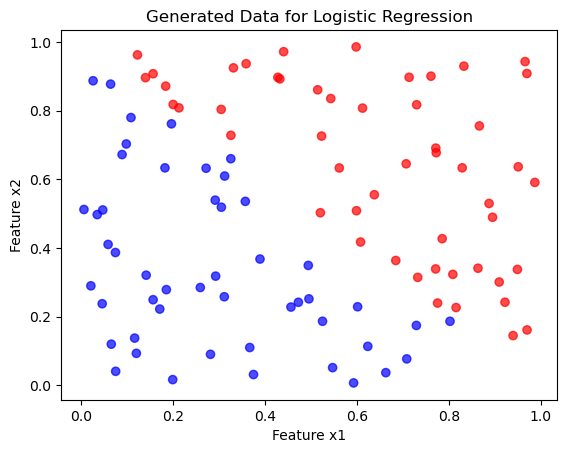

First 5 samples:
[[1.         0.37454012 0.03142919]
 [1.         0.95071431 0.63641041]
 [1.         0.73199394 0.31435598]
 [1.         0.59865848 0.50857069]
 [1.         0.15601864 0.90756647]]
First 5 target labels:
[[0]
 [1]
 [1]
 [1]
 [1]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset with two features and binary target
np.random.seed(42)

# Generate features: x1, x2
x1 = np.random.rand(100, 1)  # Random feature 1
x2 = np.random.rand(100, 1)  # Random feature 2

# Simulate binary target (y), with some noise and a linear relationship
# Let's set a threshold where if the sum of x1 and x2 is greater than 1, y = 1, else y = 0
y = (x1 + x2 > 1).astype(int)

# Combine the features into a feature matrix X
X = np.concatenate([np.ones((100, 1)), x1, x2], axis=1)  # Add intercept term (1s)

# Visualize the dataset
plt.scatter(x1, x2, c=y, cmap='bwr', alpha=0.7)
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.title('Generated Data for Logistic Regression')
plt.show()

print(f"First 5 samples:\n{X[:5]}")
print(f"First 5 target labels:\n{y[:5]}")

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)  # Number of training examples
    h = sigmoid(np.dot(X, theta))  # Predicted probabilities (sigmoid of linear model)
    
    # Compute cost using log-loss
    cost = - (1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Initial weights (theta), all set to zero
theta_init = np.zeros(X.shape[1])

# Calculate initial cost (before training)
initial_cost = cost_function(X, y, theta_init)
print(f"Initial Cost: {initial_cost}")

Initial Cost: 69.31471805599453


Formula for $\theta_1 and \theta_2$:

$$\theta_1 = \frac{\sum_{i=1}^{m} (x_{1i} - \bar{x_1})(y_i - \bar{y})}{\sum_{i=1}^{m} (x_{1i} - \bar{x_1})^2}$$

$$\theta_2 = \frac{\sum_{i=1}^{m} (x_{2i} - \bar{x_2})(y_i - \bar{y})}{\sum_{i=1}^{m} (x_{2i} - \bar{x_2})^2}$$

Where:
- $x_1$ and $x_2$ are the features.
- $y$ is the target variable.
- $\bar{x_1}$, $\bar{x_2}$, and $\bar{y}$ are the means of the respective features and target.


In [7]:
# Step 1: Calculate means of features and target
x1_mean = np.mean(x1)
x2_mean = np.mean(x2)
y_mean = np.mean(y)

# Step 2: Calculate the covariance terms (for theta_1 and theta_2)
cov_x1_y = np.sum((x1 - x1_mean) * (y - y_mean))
cov_x2_y = np.sum((x2 - x2_mean) * (y - y_mean))

# Step 3: Calculate the variance terms (for theta_1 and theta_2)
var_x1 = np.sum((x1 - x1_mean) ** 2)
var_x2 = np.sum((x2 - x2_mean) ** 2)

# Step 4: Calculate theta_1 and theta_2
theta_1_manual = cov_x1_y / var_x1
theta_2_manual = cov_x2_y / var_x2

print(f"Manually calculated theta_1 (slope for x1): {theta_1_manual}")
print(f"Manually calculated theta_2 (slope for x2): {theta_2_manual}")

# Step 5: Calculate theta_0 (intercept)
theta_0_manual = y_mean - (theta_1_manual * x1_mean + theta_2_manual * x2_mean)

print(f"Manually calculated theta_0 (intercept): {theta_0_manual}")

Manually calculated theta_1 (slope for x1): 1.0188928017147993
Manually calculated theta_2 (slope for x2): 0.9014272611882098
Manually calculated theta_0 (intercept): -0.41782286166921034


$$
\hat{y} = \sigma(\theta_0 + \theta_1 x_1 + \theta_2 x_2)
$$

In [9]:
# Step 6: Predicting for a new test case with multiple features
X_test = np.array([1, 0.8, 0.6])  # [intercept term, x1, x2]

# Apply the manually computed theta values to make a prediction
z = np.dot(X_test, [theta_0_manual, theta_1_manual, theta_2_manual])  # Linear combination
y_pred_manual = 1 / (1 + np.exp(-z))  # Apply sigmoid function

print(f"Predicted probability for the test case: {y_pred_manual}")

# Classify the predicted probability
y_pred_class = 1 if y_pred_manual >= 0.5 else 0

print(f"Predicted class for the test case: {y_pred_class}")

Predicted probability for the test case: 0.7187253570082137
Predicted class for the test case: 1
